<a href="https://colab.research.google.com/github/cardonasebastian/MNA_PROYECTO/blob/main/Avance5/Modelo_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INSTITUTO TECNOLÓGICO DE ESTUDIOS SUPERIORES DE MONTERREY

# Maestría en Inteligencia Artificial Aplicada

# TC5035.10 Proyecto Integrador:

# Optimización Estratégica de la Seguridad Vial: Implementación de un Modelo de Clasificación Avanzado para la Evaluación y Mejora de Hábitos de Conducción


#Fase 5.
# Avance 5. Modelo final.

#A01687530 - Fernando Sebastian Sanchez Cardona
#A01793670 - Bryan Alvarado Cruz
# A01793832 - Fernando Anaya Delgado

# Lee los datos safely Gold

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
file_path = '/content/drive/My Drive/MNA_PI/Gold/safety.csv'
df_safety = pd.read_csv(file_path)
df_safety

,unique_id,date,name,maxSpeed,hard_acceleration,harsh_braking,harsh_cornering,seat_belt,speeding,excessive_speeding
0,74606d62-df5f-4cf4-9ba5-262c1c64731f,2024-05-17,1,112,0,0,0,0,0,0
1,5414fa29-5a8b-402e-ba0c-65877396a103,2024-05-17,2021,114,0,0,0,0,0,0
2,02b64477-38b6-47d4-ab22-fe50d5253175,2024-05-17,2022,112,0,1,0,0,0,0
3,23ef12be-25c4-43cf-9489-5b2345fe415a,2024-05-17,2023,12,0,0,0,0,2,0
4,64adf191-c891-43d9-9ba0-3819652e285f,2024-05-17,2024,10,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
4337,4635d0c2-affb-4a62-bc95-5e92560034c0,2024-04-27,2212,122,0,12,2,7,40,3
4338,1568b4e9-172e-49e7-a12c-d3f964213804,2024-04-27,2213,0,0,0,0,0,0,0
4339,b75f5269-c9b8-41ce-b8c5-1764e18b5be7,2024-04-27,2214,116,0,0,0,0,0,0
4340,ebbec643-0dbd-4350-903e-e197e7c81284,2024-04-27,2215,118,0,2,0,0,2,0


## Se elige el modelo XGBClassifier

In [4]:

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score

In [6]:
# Cargar el dataset
df = df_safety
# Eliminar columnas innecesarias
df_limpio = df.drop(columns=['unique_id', 'date', 'name'])

# Crear una variable de riesgo basada en comportamientos de conducción
df_limpio['puntuacion_riesgo'] = df_limpio[['hard_acceleration', 'harsh_braking', 'harsh_cornering', 'seat_belt', 'speeding', 'excessive_speeding']].sum(axis=1)


## Se define la funcion para el conductor.

In [7]:
# Definir la variable objetivo basada en la puntuación de riesgo
def clasificar_conductor(puntuacion_riesgo):
    if puntuacion_riesgo == 0:
        return 0  # Buen conductor
    elif puntuacion_riesgo <= 3:
        return 1  # Conductor regular
    else:
        return 2  # Mal conductor

df_limpio['clase_conductor'] = df_limpio['puntuacion_riesgo'].apply(clasificar_conductor)

# Eliminar la columna de puntuación de riesgo
df_limpio = df_limpio.drop(columns=['puntuacion_riesgo'])

## Se definen caracteristicas y objetivos

In [8]:
# Definir características y objetivo
X = df_limpio.drop(columns=['clase_conductor'])
y = df_limpio['clase_conductor']

## Se dividen los datos de prueba y validacion

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Se normalizan los datos

In [10]:
# Normalizar las características numéricas
escalador = StandardScaler()
X_train_escalado = escalador.fit_transform(X_train)
X_test_escalado = escalador.transform(X_test)

### Se defininen los modelos a evalular los cuales son El primero que es una regresion logistica como se puede ver en la primera fase y el segundo que es el modelo que se elige

In [11]:
# Definir los modelos
modelos = {
    'Regresión Logística': LogisticRegression(max_iter=1000, random_state=42, multi_class='ovr'),
    'XGBClassifier': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
}

## Se entrenan los modelos.

In [12]:
 # Entrenar y evaluar los modelos
rendimiento_modelos = {}

for nombre_modelo, modelo in modelos.items():
    modelo.fit(X_train_escalado, y_train)
    y_pred = modelo.predict(X_test_escalado)
    precision = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    rendimiento_modelos[nombre_modelo] = {'Precisión': precision, 'F1-Score': f1}



### Se muestran los resultados de los entrenamientos de los modelos

In [13]:
# Convertir los resultados a un DataFrame para la comparación
rendimiento_df = pd.DataFrame(rendimiento_modelos).T
rendimiento_df = rendimiento_df.sort_values(by='F1-Score', ascending=False)

print("Comparación del rendimiento de los modelos:")
print(rendimiento_df)

Comparación del rendimiento de los modelos:
                     Precisión  F1-Score
XGBClassifier         0.994246  0.994266
Regresión Logística   0.947066  0.945769


## Se ajustan los hiperametros de los modelos

In [14]:
# Ajuste de Hiperparámetros para los Mejores Modelos

# XGBClassifier
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, scoring='f1_weighted', cv=5, n_jobs=-1)
grid_search_xgb.fit(X_train_escalado, y_train)

# Mejor modelo XGB
mejor_xgb = grid_search_xgb.best_estimator_
mejor_xgb_pred = mejor_xgb.predict(X_test_escalado)
mejor_xgb_f1 = f1_score(y_test, mejor_xgb_pred, average='weighted')
print("Mejor F1-Score para XGBClassifier:", mejor_xgb_f1)


Mejor F1-Score para XGBClassifier: 0.9953639969666919


## Grafica Prediccion vs Resultado

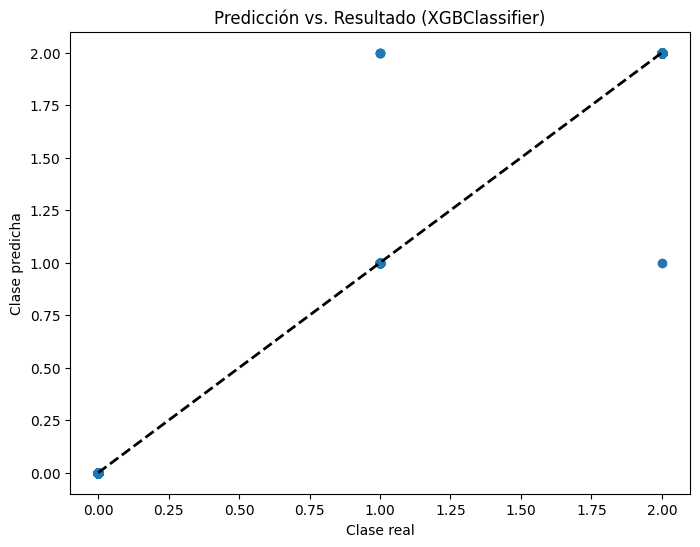

In [19]:
# prompt: puedes generar una grafica donde se vea la prediccion y el resultado del modelo  XGBClassifier y hacer el grafico y poner la explicacion de ese grafico

import matplotlib.pyplot as plt

# Obtener las predicciones del modelo
y_pred = mejor_xgb.predict(X_test_escalado)

# Crear el gráfico
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)

# Añadir líneas de referencia
plt.plot([0, 1, 2], [0, 1, 2], 'k--', linewidth=2)

# Añadir etiquetas y título
plt.xlabel('Clase real')
plt.ylabel('Clase predicha')
plt.title('Predicción vs. Resultado (XGBClassifier)')

# Mostrar el gráfico
plt.show()



### Explicación del gráfico
### - Los puntos en la diagonal representan las predicciones correctas.
### - Los puntos fuera de la diagonal representan las predicciones incorrectas.
### - La línea punteada negra representa la línea de referencia, donde las predicciones son iguales a los valores reales.
### - El gráfico muestra que el modelo XGBClassifier es capaz de predecir correctamente la clase de la mayoría de los conductores.
